In [ ]:
#6.1 BEGIN HERE

In [ ]:
#quite pip installs!
pip install --q pingouin

     |████████████████████████████████| 225kB 3.4MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.7-cp36-none-any.whl size=217260 sha256=2663c85de47b66aa9775c0f3b6c26151dbe53cb7f76bb07004e6dc78a6def914
  Stored in directory: /root/.cache/pip/wheels/02/92/32/0ed9ac4a9407227f3f070170a26d05f07d6f2a8a68989a8ac3
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=922c09b189fb63803ba48c0e514c5e0589386fe77765e8e88b76eee1d2e8ca82
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7049 sha256=3107a8175b514c53f4184b687b8fd80b88907f20068a2768e536fad6825a61af
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

import pingouin as pg

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

In [ ]:
df_diamonds=sns.load_dataset("diamonds")

In [ ]:
df_diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


carat: The weight of the diamond, equivalent to 200mg (should be a good indicator)

cut: Quality of the cut

color: Color of the diamond from J to D (worst to best)

clarity: How clear the diamond is; I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

depth: Total depth percentage (relative to x and y). Will likely be collinear.

table: Width of top of diamond relative to widest point (43--95)
price: In US dollars ($)

x, y, z: Dimensions of the diamond

In [ ]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
#looking for missing values
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#looking at our quantitative data
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#looking at our categorical data
df_diamonds.describe(include=['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


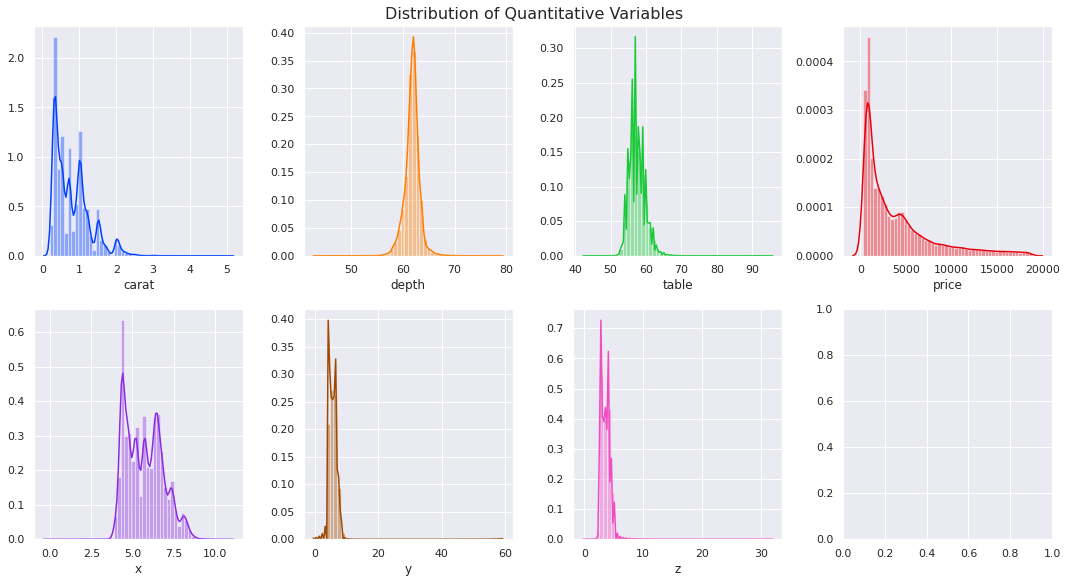

In [ ]:
sns.set(color_codes=True)
#choosing a color palette from seaborn
#options: pastel, muted, bright, deep, colorblind, dark
#tons of other ways to do this as well!
colors = sns.color_palette("bright")

#first lets set up our plotting area, this gives us 9 potential spots to plot
fig,axes = plt.subplots(2,4, figsize = (15,8))

sns.distplot(df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.distplot(df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.distplot(df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.distplot(df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.distplot(df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.distplot(df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.distplot(df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Distribution of Quantitative Variables", y= 1.01, size = 16)
plt.tight_layout()
plt.show()

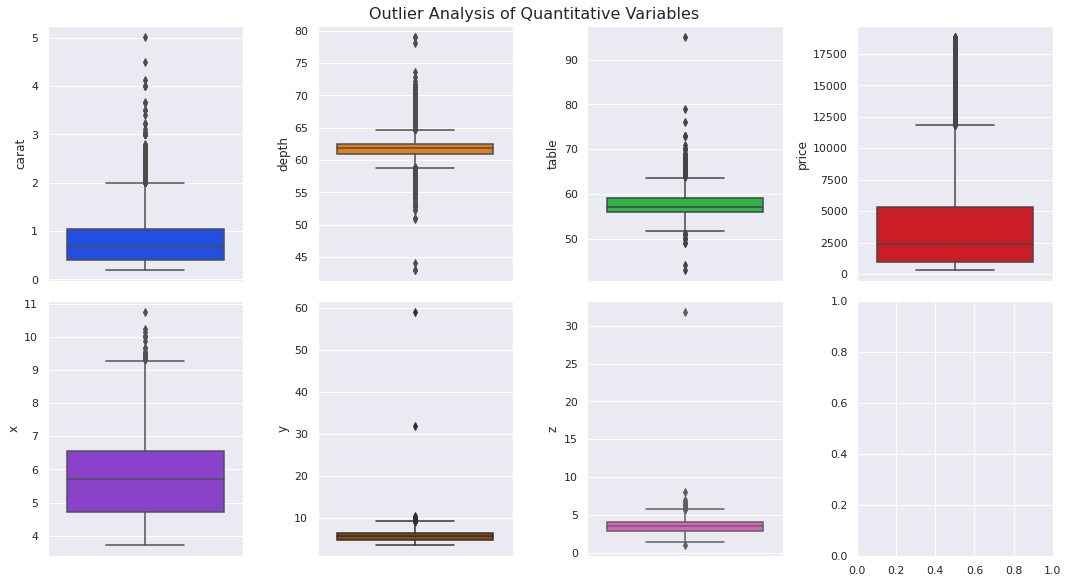

In [ ]:
sns.set(color_codes=True)
#choosing a color palette from seaborn
#options: pastel, muted, bright, deep, colorblind, dark
#tons of other ways to do this as well!
colors = sns.color_palette("bright")

#first lets set up our plotting area, this gives us 9 potential spots to plot
fig,axes = plt.subplots(2,4, figsize = (15,8))

sns.boxplot(y = df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(y = df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.boxplot(y = df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(y = df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.boxplot(y = df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.boxplot(y = df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.boxplot(y = df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Outlier Analysis of Quantitative Variables", y= 1.01, size = 16)
plt.tight_layout()
plt.show()

In [ ]:
# ENDS SECTION 6.1

In [ ]:
#begin section 6.2

In [ ]:
#looking at these distributions...looks like we have some  odd potential 0 values for x, y, z since these are dimensions
#lets check!

In [ ]:
weird_zeros = df_diamonds[(df_diamonds["x"] == 0) | (df_diamonds["y"] == 0) | (df_diamonds["z"] == 0)]

In [ ]:
weird_zeros.shape

(20, 10)

In [ ]:
weird_zeros

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
#lets get rid of these values so "clean" our data set up
df_diamonds = df_diamonds[~df_diamonds.isin(weird_zeros)].dropna(how = 'all')

In [ ]:
#we now have removed those 20 rows!
df_diamonds.shape

(53920, 10)

In [ ]:
#remember cleaning data comes from two things
# 1) Outlier Analysis
# 2) Context...this is most important, because what might be a statistical outlier is not necessarily a contextual one...

# you need both do work with specific data!

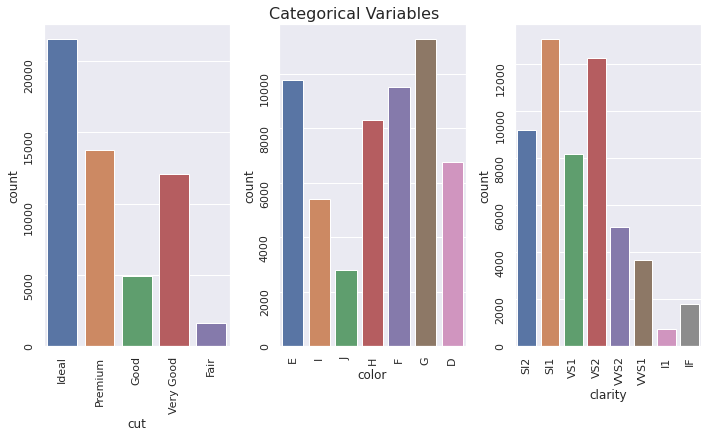

In [ ]:
#examining categorical data wit some catplots
sns.set(color_codes=True)
#choosing a color palette from seaborn
#options: pastel, muted, bright, deep, colorblind, dark
#tons of other ways to do this as well!
colors = sns.color_palette("bright")

#first lets set up our plotting area, this gives us 9 potential spots to plot
fig,axes = plt.subplots(1,3, figsize = (10,6))

sns.countplot("cut", data = df_diamonds ,ax = axes[0])
sns.countplot("color", data = df_diamonds ,ax = axes[1])
sns.countplot("clarity", data = df_diamonds ,ax = axes[2])

#quick for loop in order to access all of the subplots axes
for ax in fig.axes:
    ax.tick_params(labelrotation=90)

plt.suptitle("Categorical Variables", y= 1.01, size = 16)
plt.tight_layout()
plt.show()

In [ ]:
# BEGINS SECTION 6.2

In [ ]:
#we seen before we have categorical data within our model...while we can't work with it as it currently exists

#we can use what is called "One-Hot encoding" to include it within our model

#essentially it takes into account each possible value a given column can take on, call this "N"

#it then creates "N" new columns, if it has a given value, it gets coded as a "1"

#all other possible values within that row are then coded as a "0"

In [ ]:
#first look at this
pd.get_dummies(df_diamonds["cut"])

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
53935,0,0,1,0,0
53936,0,1,0,0,0
53937,0,0,0,0,1
53938,0,0,0,1,0


In [ ]:
#multiple columns
pd.get_dummies(data=df_diamonds, columns=['cut', 'color'])

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,SI2,61.5,55.0,326.0,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,SI1,59.8,61.0,326.0,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,VS1,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,VS2,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,SI2,63.3,58.0,335.0,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,0,0,1,0,0,1,0,0,0,0,0,0
53936,0.72,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,0,1,0,0,0,1,0,0,0,0,0,0
53937,0.70,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,0,0,0,0,1,1,0,0,0,0,0,0
53938,0.86,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
#automatically works with all categorical columns (ideal and fastest option)
df = pd.concat([df_diamondsX,new_cols], axis = 1)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
#lets make that into a new dataframe for the remainder of our usage, since it is now clean and categorical variables have been handled
#always want to make a new one here, don't rename the original because then it will be "lost"
df = pd.get_dummies(df_diamonds)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head(5)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
# we'll need to create training versus testing data sets so that we don't introduce bias into our modeling

#thus we'll split apart our data into a 70/30 split...some use 80/20 but since we have a very large dataset 

#we can increase our holdout (testing data set)

In [ ]:
#random state, pick a #, ensures that if we go back and re execute code that the 'random' selected data will be consistent
#this creates out two dataframes to pull from to build models, and then unbiasly test them
train_df, test_df = train_test_split(df, test_size=0.3, random_state=32)

In [ ]:
#separating our testing data into two data frames, separating the price column for later evaluation
#make sure to copy the column before dropping it in the second line here
#for now we'll also drop the categorical variables, those will require additional methods for analysis
Y_test = test_df["price"]

X_test = test_df.drop(columns= ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns= ["price"], axis = 1)

In [ ]:
#in order to determine how well our predictions were, first lets create a defintion for some error metrics

#Mean Absolute Error (how far away are my predictions from ground truth?)

#Mean Squared Error (is my model making large errors?)

#R2  Score (goodness-of-fit)

def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

In [ ]:
#ends section 6.2

In [ ]:
#begins section 6.3

In [ ]:
#linear regression is the first model we will work with, its a classic that should always be your first step
#lets start with defining our model

linear_regression = LinearRegression()

In [ ]:
#now we use our training data to build out our model
linear_regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To retrieve the intercept:
print(linear_regression.intercept_)

print(" ")

#For retrieving the slope:
print(linear_regression.coef_)

1846.8836019176697
 
[ 1.14480658e+04  6.88836351e+00 -2.89140173e+01 -4.04784670e+02
  9.95915465e+01 -1.30686750e+03 -5.81097134e+02  1.41614149e+01
  2.42270124e+02  1.71724825e+02  1.52940770e+02  8.31872392e+02
  6.21881739e+02  5.53663697e+02  3.61329985e+02 -1.65629944e+02
 -6.47804076e+02 -1.55531379e+03 -3.85769893e+03  1.53481199e+03
 -1.42119621e+02 -1.10305581e+03  7.78028869e+02  4.54771682e+02
  1.20881543e+03  1.12644639e+03]


In [ ]:
#assessing the predictive capabilities of our model, by using it on our Y_test data
Y_pred_linear = linear_regression.predict(X_test)

In [ ]:
linear_comparison = pd.DataFrame({"Actual": Y_test, "Predicted": Y_pred_linear})

linear_comparison

,Actual,Predicted
870,2872.0,3300.875445
30111,720.0,479.494603
7191,4187.0,4716.089344
2152,3127.0,4329.665691
1612,3012.0,3212.395569
...,...,...
46361,1760.0,2497.984747
15399,6169.0,6186.496023
51624,2396.0,121.257806
46355,1760.0,829.709079


In [ ]:
#linear regression error metrics
error_metrics(Y_test, Y_pred_linear)

('Mean Absolute Error: 733.1888806720818',
 'Mean Square Error: 1308294.638271988',
 'r2 score: 0.9179329067326987')

In [ ]:
#lets see how many of our predictions are within various "jumps" from the actual price
#Creating a New column for differences between the actual and predicted
linear_comparison["Diff"] = np.abs(linear_comparison["Actual"] - linear_comparison["Predicted"])

In [ ]:
#lets look at a few different ranges of error here in our predictions
linear_comparison["Jump100"] = ['Yes' if x <= 100.00 else 'No' for x in linear_comparison['Diff']]

linear_comparison["Jump200"] = ['Yes' if x <= 200.00 else 'No' for x in linear_comparison['Diff']]

linear_comparison["Jump500"] = ['Yes' if x <= 500.00 else 'No' for x in linear_comparison['Diff']]

linear_comparison["Jump1000"] = ['Yes' if x <= 1000.00 else 'No' for x in linear_comparison['Diff']]

In [ ]:
linear_comparison.head(10)

,Actual,Predicted,Diff,Jump100,Jump200,Jump500,Jump1000
870,2872.0,3300.875445,428.875445,No,No,Yes,Yes
30111,720.0,479.494603,240.505397,No,No,Yes,Yes
7191,4187.0,4716.089344,529.089344,No,No,No,Yes
2152,3127.0,4329.665691,1202.665691,No,No,No,No
1612,3012.0,3212.395569,200.395569,No,No,Yes,Yes
49476,2115.0,1831.900504,283.099496,No,No,Yes,Yes
28308,432.0,-909.680465,1341.680465,No,No,No,No
9650,4641.0,5372.994838,731.994838,No,No,No,Yes
46576,1785.0,2488.890930,703.890930,No,No,No,Yes
43972,518.0,668.636333,150.636333,No,Yes,Yes,Yes


In [ ]:
linear_comparison["Jump100"].value_counts()

No     14621
Yes     1555
Name: Jump100, dtype: int64

In [ ]:
linear_comparison["Jump200"].value_counts()

No     13023
Yes     3153
Name: Jump200, dtype: int64

In [ ]:
linear_comparison["Jump500"].value_counts()

No     8436
Yes    7740
Name: Jump500, dtype: int64

In [ ]:
linear_comparison["Jump1000"].value_counts()

Yes    12975
No      3201
Name: Jump1000, dtype: int64

In [ ]:
12975/(12975+3201)

0.8021142433234422

In [ ]:
#lets see how linear regression looks using statsmodels, we'll use the same data and samples as created above
model_linear = sm.OLS(Y_train, X_train)
linear_stats_model = model_linear.fit()
print(linear_stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.859e+04
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:56:56   Log-Likelihood:            -3.1905e+05
No. Observations:               37744   AIC:                         6.382e+05
Df Residuals:                   37720   BIC:                         6.384e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          1.145e+04     62.407    183.442

In [ ]:
#lastly, lets look at linear regression with Pingouin
#notice the difference in order where Y goes as the dependent, predicted, variable
#the one odd caveat here is the way we need to specifcy the column names
#essentially you could select them all with something like df.columns - copy/paste it
#for the sake of our examples lets just examine the measures of x,y,z
linear_ping_model = pg.linear_regression(X_train[["x","y","z"]], Y_train)
linear_ping_model

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-14194.266287,49.514073,-286.671352,0.000000e+00,0.786796,0.786779,-14291.315199,-14097.217374
1,x,2541.628533,64.601138,39.343402,0.000000e+00,0.786796,0.786779,2415.008569,2668.248497
2,y,83.975036,32.279599,2.601489,9.285614e-03,0.786796,0.786779,20.706156,147.243916
3,z,869.335212,102.839365,8.453331,2.931102e-17,0.786796,0.786779,667.767295,1070.903128


In [ ]:
#end of section 6.3

In [ ]:
#BEGINS SECTION 6.4

(50, 1)
(50, 1)


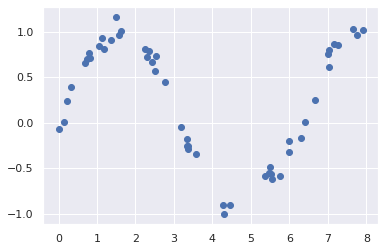

In [ ]:
#we'll be using some created data here to understand polynomial regression

rng = np.random.RandomState(1)
x = 8 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

#Create single dimension
x= x[:,np.newaxis]
y= y[:,np.newaxis]

inds = x.ravel().argsort()  # Sort x values and get index    
x = x.ravel()[inds].reshape(-1,1)
y = y[inds] #Sort y according to x sorted index

print(x.shape)
print(y.shape)

#Plot
sns.set(color_codes=True)
plt.scatter(x,y)
plt.show()

In [ ]:
model = sm.OLS(y, x).fit()

ypred = model.predict(x) 

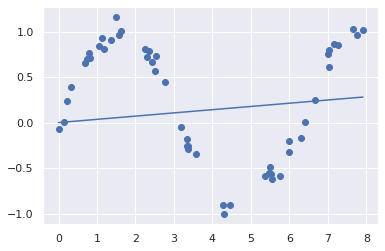

In [ ]:
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
xp.shape

(50, 4)

In [ ]:
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

ypred.shape

(50,)

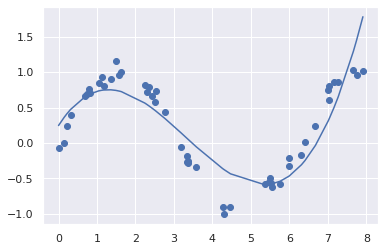

In [ ]:
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

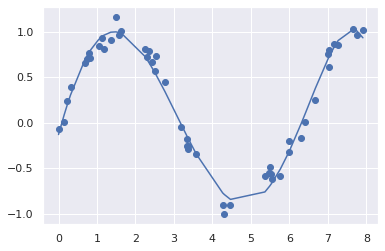

In [ ]:
polynomial_features= PolynomialFeatures(degree=5)
xp = polynomial_features.fit_transform(x)
xp.shape

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     336.2
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           7.19e-34
Time:                        04:30:40   Log-Likelihood:                 44.390
No. Observations:                  50   AIC:                            -76.78
Df Residuals:                      44   BIC:                            -65.31
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1327      0.070     -1.888      0.0

In [ ]:
#ends section 6.4

In [ ]:
#begins section 6.5

In [ ]:
#data processing to keep our data set consistent
df_diamonds=sns.load_dataset("diamonds")
weird_zeros = df_diamonds[(df_diamonds["x"] == 0) | (df_diamonds["y"] == 0) | (df_diamonds["z"] == 0)]
df_diamonds = df_diamonds[~df_diamonds.isin(weird_zeros)].dropna(how = 'all')

df = pd.get_dummies(df_diamonds)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=32)

Y_test = test_df["price"]

X_test = test_df.drop(columns= ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns= ["price"], axis = 1)

In [ ]:
def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

In [ ]:
#different alphas commonly used for Ridge
alphas = [.01,.1,1,10,100,1000,10000]

In [ ]:
#setting up and fitting our model with various alphas
ridge = RidgeCV(alphas = alphas, cv = 5)
ridge_fit = ridge.fit(X_train, Y_train)

In [ ]:
yhat_ridge = ridge_fit.predict(X_test)

In [ ]:
# Ridge error metrics #
error_metrics(Y_test, yhat_ridge)

('Mean Absolute Error: 733.5597330241831',
 'Mean Square Error: 1304647.1332433235',
 'r2 score: 0.918161708507638')

In [ ]:
#end of section 6.5

In [ ]:
#begins section 6.6

In [ ]:
lasso = LassoCV(cv=5, random_state=32, alphas = alphas)
lasso_fit = lasso.fit(X_train, Y_train)
yhat_lasso = lasso_fit.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134937573.6228485, tolerance: 48333020.23034175
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484506026.73838043, tolerance: 48333020.23034175
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058157404.2211609, tolerance: 48333020.23034175
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

In [ ]:
error_metrics(Y_test, yhat_lasso)

('Mean Absolute Error: 732.1982897309077',
 'Mean Square Error: 1260920.8985053604',
 'r2 score: 0.9209045807013267')

In [ ]:
linear_comparison = pd.DataFrame({"Actual":Y_test, "Predicted":Y_pred_linear})

In [ ]:
#end of section 6.6

In [ ]:
#begins section 6.7

In [ ]:
elasticnet = ElasticNetCV(cv=5, random_state=32,
                          l1_ratio = 0.9,
                          alphas = alphas)
elastic_fit = elasticnet.fit(X_train, Y_train)
yhat_elastic = elastic_fit.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4441884945.2956085, tolerance: 48333020.23034175
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8498380914.320335, tolerance: 47473081.168359995
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7531633938.280333, tolerance: 48090730.86859131
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

In [ ]:
error_metrics(Y_test, yhat_elastic)

('Mean Absolute Error: 750.4413976185278',
 'Mean Square Error: 1264930.1069945067',
 'r2 score: 0.9206530898846699')

In [ ]:
#end of section 6.7

In [ ]:
#begins section 6.8

In [ ]:
randomforest = RandomForestRegressor(max_depth=5, 
                                     random_state=32, 
                                     n_estimators = 1000)

In [ ]:
#takes a while
rf_fit = randomforest.fit(X_train, Y_train)
yhat_rf = rf_fit.predict(X_test)

In [ ]:
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 626.6798713799598',
 'Mean Square Error: 1307846.2648511333',
 'r2 score: 0.9179610324333408')

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 32)
rf_fit = rf.fit(X_train, Y_train)
yhat_rf = rf_fit.predict(X_test)

In [ ]:
error_metrics(Y_test, yhat_rf)

In [ ]:
#new import we need!
from sklearn.model_selection import cross_val_score

#lets rename some things here to make this model more understandable
features = X_train.copy()
targets = Y_train.copy()

#defining the models we want to compare
#lets check out linear, elastic net, and random forest!

models = [
          LinearRegression(),
          RidgeCV(),
          LassoCV(),
          ElasticNetCV(),
          RandomForestRegressor()
]

#setting up the instructions for our comparison tool

#Number of cross validation to performs, 5 is standard number
CV = 5
#creating our cross validation data frame
cv_df = pd.DataFrame(index=range(CV * len(models)))
#empty initial list for entries in our dataframe
entries = []
#outer for loop to execute our cross validations of the above models
for model in models:
  #accessing model information class
  model_name = model.__class__.__name__
  #getting parameters of model to calculate R2
  accuracies = cross_val_score(model, features, targets, scoring='r2', cv=CV)
  #inner for loop to fill the entries list to build the ending dataframe
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    #finalizing the dataframe with appended entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'r2'])

In [ ]:
#visualizing the results
sns.boxplot(x='model_name', y='r2', data=cv_df)
sns.stripplot(x='model_name', y='r2', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Regression Models', fontsize=20)
plt.ylabel('R Squared', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.show()

In [ ]:
#looking at average r squared
final_comp = cv_df.groupby('model_name').r2.mean().reset_index().sort_values(by = "r2", ascending = False)
final_comp

In [ ]:
from sklearn.model_selection import GridSearchCV

RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [ ]:
#grid search cross validation to optimize our Random Forest Regressor
regressor = RandomForestRegressor(random_state=32)

In [ ]:
grid = {
    "n_estimators" : [50,100,200,500],
    "criterion" : ["mse","mae"]
}

GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [ ]:
grid_apply = GridSearchCV(regressor, grid, scoring= "r2", cv = 10, refit = True, iid = False, verbose = 0)

In [ ]:
#takes time...like 10 minutes+
grid_apply.fit(features,targets)

In [ ]:
#looking at the best outcome scenario in terms of r squared
best_perf = grid_apply.best_score_

#looking for the best parameters to utilize
best_model = grid_apply.best_estimator_

In [ ]:
#printing out best score results for our model
print("Best R Square=" + " " + str(best_perf))
print(" ")
print("Best R Square=" + " " + str(best_model))